In [1]:
# Analiza i modyfikacja danych
import pandas as pd
import numpy as np
import random
# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ewaluacja
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score

In [2]:
# wczytujemy dane
train_df = pd.read_csv('Data/train.csv')
train_df = train_df.drop(['PassengerId'], axis=1)

## Nasz zbiór Dane o pasażerach Titanic'a
| Zmienna | Definicja | Klucz |
|---------|-----------|-------|
|Survival| Czy ktoś przeżył|0 = Nie, 1 = Tak|
|pclass| Jakiej klasy bilet posiadał |1-pierwsza 2-druga 3-trzecia|
|Sex|płeć||
|Age|wiek||
|Sibsp|liczba rodzeństwa/małżonków na statku||
|Parch|Liczba rodziców/dzieci na statku||
|Ticket|numer biletu||
|Fare|opłata pasażerska||
|Cabin|Numer kabiny||
|Embarked|Port na którym dana osoba wsiadła| C = Cherbourg, Q = Queenstown, S = Southampton|


In [3]:
# Dane o bilecie oraz kabinie nic nie wnoszą co do przeżycia więc je odrzucamy
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

In [4]:
# wydobywamy z imion przedrostki typu Mr, Ms, Master itd.
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [5]:
# Zastępujemy rzadko występujące przedrostki nazwą Other oraz poprawiamy inne przedrostki
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
# Wyliczamy średnie przeżycie dla róznych tytułów    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [6]:
# Odrzucamy imię ponieważ już nic nie wnosi.
train_df = train_df.drop(['Name'], axis=1)

In [7]:
# Wyciągamy zmienną którą nasz model będzie przewidywał
Y = train_df['Survived'].values

In [8]:
train_df = train_df.drop(['Survived'], axis=1)

In [9]:
# uzupełniamy wiek średnią
age_mean = np.mean(train_df['Age'])
train_df['Age'] = train_df[['Age']].fillna(age_mean)

# pozostałe zastępujemy flagą missing
train_df = train_df.fillna('missing')

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
None


In [10]:
# Kodujemy zmienne kategoryczne
categoricals = list(train_df.select_dtypes(include=['O']).columns) + ['Pclass']
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(train_df[categoricals])
# Tworzymy data frame z zakodowanymi zmiennymi a następnie dodajemy go do naszego
# i usuwamy zmienne niezakodowane
train_ohe = pd.DataFrame(encoded, columns=np.hstack(encoder.categories_))
train_df = pd.concat((train_df, train_ohe), axis=1).drop(categoricals, axis=1)

In [11]:
# Dokonujemy podziału danych na zbiór uczący i testujący
X = train_df.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [31]:
# Tworzymy nasz w pełni połączony model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, batch_size=712, epochs=100)

Train on 712 samples
Epoch 1/100
712/712 [==============================] - 1s 824us/sample - loss: 0.5324 - accuracy: 0.3806
Epoch 2/100
712/712 [==============================] - 0s 1us/sample - loss: 0.4524 - accuracy: 0.3806
Epoch 3/100
712/712 [==============================] - 0s 7us/sample - loss: 0.2581 - accuracy: 0.6306
Epoch 4/100
712/712 [==============================] - 0s 4us/sample - loss: 0.2238 - accuracy: 0.6770
Epoch 5/100
712/712 [==============================] - 0s 3us/sample - loss: 0.2206 - accuracy: 0.6784
Epoch 6/100
712/712 [==============================] - 0s 6us/sample - loss: 0.2186 - accuracy: 0.6784
Epoch 7/100
712/712 [==============================] - 0s 4us/sample - loss: 0.2171 - accuracy: 0.6770
Epoch 8/100
712/712 [==============================] - 0s 4us/sample - loss: 0.2163 - accuracy: 0.6784
Epoch 9/100
712/712 [==============================] - 0s 10us/sample - loss: 0.2157 - accuracy: 0.6770
Epoch 10/100
712/712 [===========================

Epoch 80/100
712/712 [==============================] - 0s 8us/sample - loss: 0.2039 - accuracy: 0.7093
Epoch 81/100
712/712 [==============================] - 0s 4us/sample - loss: 0.2013 - accuracy: 0.6966
Epoch 82/100
712/712 [==============================] - 0s 9us/sample - loss: 0.2034 - accuracy: 0.7079
Epoch 83/100
712/712 [==============================] - 0s 5us/sample - loss: 0.2008 - accuracy: 0.6966
Epoch 84/100
712/712 [==============================] - 0s 7us/sample - loss: 0.2025 - accuracy: 0.7079
Epoch 85/100
712/712 [==============================] - 0s 8us/sample - loss: 0.2004 - accuracy: 0.6966
Epoch 86/100
712/712 [==============================] - 0s 7us/sample - loss: 0.2028 - accuracy: 0.7121
Epoch 87/100
712/712 [==============================] - 0s 9us/sample - loss: 0.2005 - accuracy: 0.6966
Epoch 88/100
712/712 [==============================] - 0s 5us/sample - loss: 0.2031 - accuracy: 0.7121
Epoch 89/100
712/712 [==============================] - 0s 7us/s

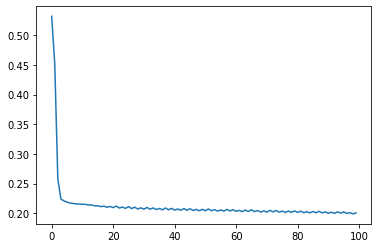

In [34]:
sns.lineplot(range(len(history.history['loss'])), history.history['loss'])

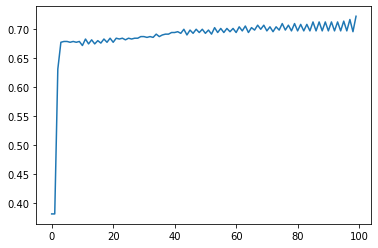

In [35]:
sns.lineplot(range(len(history.history['accuracy'])), history.history['accuracy'])

In [37]:
# Dajemy naszemu modelowi dane do przewidzenia i porównujemy wyniki z rzeczywistymi
pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f_score = f1_score(y_test, pred)

print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
        acc, precision, recall, f_score))

Accuracy: 0.7150837988826816
Precision: 0.7941176470588235
Recall: 0.38028169014084506
F1_score: 0.5142857142857142


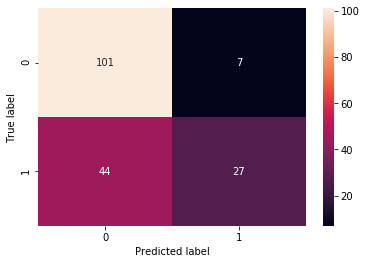

In [38]:
sns.heatmap(cm, annot=True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [82]:
# Tworzymy większy model z Dropoutem Dzięki czemu lepiej generalizuje
model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
history = model.fit(X_train, y_train, batch_size=512, epochs=2000, shuffle=True)

Train on 712 samples
Epoch 1/2000
712/712 [==============================] - 1s 2ms/sample - loss: 1.1065 - accuracy: 0.6180
Epoch 2/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.8405 - accuracy: 0.6138
Epoch 3/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.7231 - accuracy: 0.5899
Epoch 4/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.7169 - accuracy: 0.5674
Epoch 5/2000
712/712 [==============================] - 0s 92us/sample - loss: 0.7173 - accuracy: 0.5941
Epoch 6/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.6721 - accuracy: 0.5885
Epoch 7/2000
712/712 [==============================] - 0s 79us/sample - loss: 0.6747 - accuracy: 0.6039
Epoch 8/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.6601 - accuracy: 0.6222
Epoch 9/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.6829 - accuracy: 0.6096
Epoch 10/2000
712/712 [============

712/712 [==============================] - 0s 86us/sample - loss: 0.5349 - accuracy: 0.7669
Epoch 78/2000
712/712 [==============================] - 0s 77us/sample - loss: 0.5566 - accuracy: 0.7528
Epoch 79/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.5509 - accuracy: 0.7584
Epoch 80/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.5708 - accuracy: 0.7542
Epoch 81/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.5651 - accuracy: 0.7542
Epoch 82/2000
712/712 [==============================] - 0s 75us/sample - loss: 0.5619 - accuracy: 0.7640
Epoch 83/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.5355 - accuracy: 0.7528
Epoch 84/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.5448 - accuracy: 0.7725
Epoch 85/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.5415 - accuracy: 0.7626
Epoch 86/2000
712/712 [==============================] - 0s 

712/712 [==============================] - 0s 115us/sample - loss: 0.5080 - accuracy: 0.7963
Epoch 154/2000
712/712 [==============================] - 0s 99us/sample - loss: 0.5277 - accuracy: 0.7921
Epoch 155/2000
712/712 [==============================] - 0s 127us/sample - loss: 0.5074 - accuracy: 0.7935
Epoch 156/2000
712/712 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.79 - 0s 82us/sample - loss: 0.5055 - accuracy: 0.8006
Epoch 157/2000
712/712 [==============================] - 0s 107us/sample - loss: 0.5254 - accuracy: 0.7978
Epoch 158/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.5286 - accuracy: 0.7963
Epoch 159/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.5155 - accuracy: 0.7992
Epoch 160/2000
712/712 [==============================] - 0s 94us/sample - loss: 0.4972 - accuracy: 0.7949
Epoch 161/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.5030 - accuracy: 0.8020
Epoch 1

712/712 [==============================] - 0s 86us/sample - loss: 0.5036 - accuracy: 0.7893
Epoch 230/2000
712/712 [==============================] - 0s 76us/sample - loss: 0.4767 - accuracy: 0.8146
Epoch 231/2000
712/712 [==============================] - 0s 77us/sample - loss: 0.4934 - accuracy: 0.8104
Epoch 232/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.4897 - accuracy: 0.8062
Epoch 233/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.4838 - accuracy: 0.7992
Epoch 234/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.5034 - accuracy: 0.7949
Epoch 235/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.4864 - accuracy: 0.8174
Epoch 236/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.4844 - accuracy: 0.8006
Epoch 237/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.4932 - accuracy: 0.8104
Epoch 238/2000
712/712 [============================

712/712 [==============================] - 0s 77us/sample - loss: 0.4881 - accuracy: 0.8216
Epoch 306/2000
712/712 [==============================] - 0s 79us/sample - loss: 0.4736 - accuracy: 0.8188
Epoch 307/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.4621 - accuracy: 0.8146
Epoch 308/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.4816 - accuracy: 0.8118
Epoch 309/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.4703 - accuracy: 0.8216
Epoch 310/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.4835 - accuracy: 0.8146
Epoch 311/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.4599 - accuracy: 0.8202
Epoch 312/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.4756 - accuracy: 0.8258
Epoch 313/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.4653 - accuracy: 0.8244
Epoch 314/2000
712/712 [============================

712/712 [==============================] - 0s 87us/sample - loss: 0.4497 - accuracy: 0.8315
Epoch 382/2000
712/712 [==============================] - 0s 75us/sample - loss: 0.4364 - accuracy: 0.8455
Epoch 383/2000
712/712 [==============================] - 0s 92us/sample - loss: 0.4597 - accuracy: 0.8287
Epoch 384/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.4655 - accuracy: 0.8272
Epoch 385/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.4504 - accuracy: 0.8174
Epoch 386/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.4487 - accuracy: 0.8034
Epoch 387/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.4399 - accuracy: 0.8315
Epoch 388/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.4395 - accuracy: 0.8343
Epoch 389/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.4501 - accuracy: 0.8329
Epoch 390/2000
712/712 [============================

712/712 [==============================] - 0s 87us/sample - loss: 0.4193 - accuracy: 0.8399
Epoch 458/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.4415 - accuracy: 0.8216
Epoch 459/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.4209 - accuracy: 0.8371
Epoch 460/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.4303 - accuracy: 0.8385
Epoch 461/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.4133 - accuracy: 0.8287
Epoch 462/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.4199 - accuracy: 0.8427
Epoch 463/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.4428 - accuracy: 0.8244
Epoch 464/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.4278 - accuracy: 0.8343
Epoch 465/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.4235 - accuracy: 0.8413
Epoch 466/2000
712/712 [============================

712/712 [==============================] - 0s 89us/sample - loss: 0.4094 - accuracy: 0.8539
Epoch 534/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3885 - accuracy: 0.8385
Epoch 535/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.4023 - accuracy: 0.8413
Epoch 536/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.3905 - accuracy: 0.8511
Epoch 537/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.4093 - accuracy: 0.8455
Epoch 538/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.4070 - accuracy: 0.8455
Epoch 539/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3957 - accuracy: 0.8413
Epoch 540/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.4009 - accuracy: 0.8610
Epoch 541/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.4066 - accuracy: 0.8469
Epoch 542/2000
712/712 [============================

712/712 [==============================] - 0s 83us/sample - loss: 0.4182 - accuracy: 0.8413
Epoch 610/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3953 - accuracy: 0.8497
Epoch 611/2000
712/712 [==============================] - 0s 96us/sample - loss: 0.3898 - accuracy: 0.8483
Epoch 612/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.3861 - accuracy: 0.8455
Epoch 613/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3755 - accuracy: 0.8596
Epoch 614/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3901 - accuracy: 0.8638
Epoch 615/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3741 - accuracy: 0.8666
Epoch 616/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3735 - accuracy: 0.8610
Epoch 617/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3867 - accuracy: 0.8427
Epoch 618/2000
712/712 [============================

712/712 [==============================] - 0s 82us/sample - loss: 0.3693 - accuracy: 0.8736
Epoch 686/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3629 - accuracy: 0.8610
Epoch 687/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3726 - accuracy: 0.8469
Epoch 688/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.3789 - accuracy: 0.8652
Epoch 689/2000
712/712 [==============================] - 0s 79us/sample - loss: 0.3741 - accuracy: 0.8694
Epoch 690/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3744 - accuracy: 0.8553
Epoch 691/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.3714 - accuracy: 0.8455
Epoch 692/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3468 - accuracy: 0.8694
Epoch 693/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3689 - accuracy: 0.8567
Epoch 694/2000
712/712 [============================

712/712 [==============================] - 0s 75us/sample - loss: 0.3412 - accuracy: 0.8736
Epoch 762/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3657 - accuracy: 0.8722
Epoch 763/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.3550 - accuracy: 0.8596
Epoch 764/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3505 - accuracy: 0.8722
Epoch 765/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3433 - accuracy: 0.8792
Epoch 766/2000
712/712 [==============================] - 0s 93us/sample - loss: 0.3717 - accuracy: 0.8525
Epoch 767/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3525 - accuracy: 0.8596
Epoch 768/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3736 - accuracy: 0.8610
Epoch 769/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.3658 - accuracy: 0.8553
Epoch 770/2000
712/712 [============================

712/712 [==============================] - 0s 84us/sample - loss: 0.3600 - accuracy: 0.8708
Epoch 838/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3384 - accuracy: 0.8708
Epoch 839/2000
712/712 [==============================] - 0s 76us/sample - loss: 0.3632 - accuracy: 0.8624
Epoch 840/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3522 - accuracy: 0.8624
Epoch 841/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3448 - accuracy: 0.8610
Epoch 842/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3323 - accuracy: 0.8708
Epoch 843/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.3551 - accuracy: 0.8539
Epoch 844/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3420 - accuracy: 0.8778
Epoch 845/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3504 - accuracy: 0.8778
Epoch 846/2000
712/712 [============================

712/712 [==============================] - 0s 75us/sample - loss: 0.3372 - accuracy: 0.8764
Epoch 914/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3434 - accuracy: 0.8596
Epoch 915/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3533 - accuracy: 0.8610
Epoch 916/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3213 - accuracy: 0.8736
Epoch 917/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.3577 - accuracy: 0.8567
Epoch 918/2000
712/712 [==============================] - 0s 77us/sample - loss: 0.3532 - accuracy: 0.8778
Epoch 919/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3473 - accuracy: 0.8764
Epoch 920/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3483 - accuracy: 0.8694
Epoch 921/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3527 - accuracy: 0.8610
Epoch 922/2000
712/712 [============================

712/712 [==============================] - 0s 78us/sample - loss: 0.3330 - accuracy: 0.8722
Epoch 990/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3467 - accuracy: 0.8764
Epoch 991/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3349 - accuracy: 0.8736
Epoch 992/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3168 - accuracy: 0.8876
Epoch 993/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3376 - accuracy: 0.8610
Epoch 994/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3287 - accuracy: 0.8764
Epoch 995/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3244 - accuracy: 0.8820
Epoch 996/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3147 - accuracy: 0.8876
Epoch 997/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3246 - accuracy: 0.8792
Epoch 998/2000
712/712 [============================

712/712 [==============================] - 0s 75us/sample - loss: 0.3083 - accuracy: 0.8834
Epoch 1066/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3343 - accuracy: 0.8820
Epoch 1067/2000
712/712 [==============================] - 0s 79us/sample - loss: 0.3241 - accuracy: 0.8820
Epoch 1068/2000
712/712 [==============================] - 0s 92us/sample - loss: 0.3299 - accuracy: 0.8666
Epoch 1069/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.3473 - accuracy: 0.8694
Epoch 1070/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3315 - accuracy: 0.8666
Epoch 1071/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.3545 - accuracy: 0.8511
Epoch 1072/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3167 - accuracy: 0.8792
Epoch 1073/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3173 - accuracy: 0.8834
Epoch 1074/2000
712/712 [===================

Epoch 1141/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3083 - accuracy: 0.8778
Epoch 1142/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.3120 - accuracy: 0.8848
Epoch 1143/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3289 - accuracy: 0.8764
Epoch 1144/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3128 - accuracy: 0.8933
Epoch 1145/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.2959 - accuracy: 0.8876
Epoch 1146/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.3191 - accuracy: 0.8848
Epoch 1147/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3320 - accuracy: 0.8722
Epoch 1148/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.3179 - accuracy: 0.8624
Epoch 1149/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3133 - accuracy: 0.8820
Epoch 1150/2000
712/712 [===

712/712 [==============================] - 0s 87us/sample - loss: 0.3124 - accuracy: 0.8652
Epoch 1217/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.3163 - accuracy: 0.8806
Epoch 1218/2000
712/712 [==============================] - 0s 101us/sample - loss: 0.3121 - accuracy: 0.8764
Epoch 1219/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3032 - accuracy: 0.8834
Epoch 1220/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3125 - accuracy: 0.8862
Epoch 1221/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3256 - accuracy: 0.8806
Epoch 1222/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.3174 - accuracy: 0.8722
Epoch 1223/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.3114 - accuracy: 0.8820
Epoch 1224/2000
712/712 [==============================] - 0s 97us/sample - loss: 0.3163 - accuracy: 0.8820
Epoch 1225/2000
712/712 [==================

Epoch 1292/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3550 - accuracy: 0.8511
Epoch 1293/2000
712/712 [==============================] - 0s 94us/sample - loss: 0.3323 - accuracy: 0.8764
Epoch 1294/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.3247 - accuracy: 0.8638
Epoch 1295/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3177 - accuracy: 0.8708
Epoch 1296/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.2954 - accuracy: 0.8820
Epoch 1297/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.3070 - accuracy: 0.8848
Epoch 1298/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3219 - accuracy: 0.8694
Epoch 1299/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3185 - accuracy: 0.8834
Epoch 1300/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.2917 - accuracy: 0.8933
Epoch 1301/2000
712/712 [===

712/712 [==============================] - 0s 85us/sample - loss: 0.3318 - accuracy: 0.8736
Epoch 1368/2000
712/712 [==============================] - 0s 77us/sample - loss: 0.3125 - accuracy: 0.8862
Epoch 1369/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3053 - accuracy: 0.8820
Epoch 1370/2000
712/712 [==============================] - 0s 77us/sample - loss: 0.3014 - accuracy: 0.8904
Epoch 1371/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.3078 - accuracy: 0.8834
Epoch 1372/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.3188 - accuracy: 0.8806
Epoch 1373/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3081 - accuracy: 0.8792
Epoch 1374/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.2918 - accuracy: 0.8890
Epoch 1375/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.2873 - accuracy: 0.8820
Epoch 1376/2000
712/712 [===================

712/712 [==============================] - 0s 82us/sample - loss: 0.3034 - accuracy: 0.8933
Epoch 1444/2000
712/712 [==============================] - 0s 78us/sample - loss: 0.3105 - accuracy: 0.8834
Epoch 1445/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.2865 - accuracy: 0.8890
Epoch 1446/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3113 - accuracy: 0.8834
Epoch 1447/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2779 - accuracy: 0.8862
Epoch 1448/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.2903 - accuracy: 0.8806
Epoch 1449/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.3224 - accuracy: 0.8708
Epoch 1450/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.3024 - accuracy: 0.8975
Epoch 1451/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3023 - accuracy: 0.8890
Epoch 1452/2000
712/712 [===================

Epoch 1519/2000
712/712 [==============================] - 0s 100us/sample - loss: 0.3113 - accuracy: 0.8876
Epoch 1520/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.2735 - accuracy: 0.8876
Epoch 1521/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.3029 - accuracy: 0.8736
Epoch 1522/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3171 - accuracy: 0.8722
Epoch 1523/2000
712/712 [==============================] - 0s 105us/sample - loss: 0.3000 - accuracy: 0.8764
Epoch 1524/2000
712/712 [==============================] - 0s 108us/sample - loss: 0.2934 - accuracy: 0.8820
Epoch 1525/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.2981 - accuracy: 0.8904
Epoch 1526/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.2935 - accuracy: 0.8820
Epoch 1527/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2917 - accuracy: 0.8876
Epoch 1528/2000
712/712 [

712/712 [==============================] - 0s 90us/sample - loss: 0.3022 - accuracy: 0.8778
Epoch 1595/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3039 - accuracy: 0.8722
Epoch 1596/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.3134 - accuracy: 0.8834
Epoch 1597/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3073 - accuracy: 0.8848
Epoch 1598/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3032 - accuracy: 0.8834
Epoch 1599/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.3173 - accuracy: 0.8862
Epoch 1600/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.2928 - accuracy: 0.8947
Epoch 1601/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.2940 - accuracy: 0.8876
Epoch 1602/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.2762 - accuracy: 0.8933
Epoch 1603/2000
712/712 [===================

Epoch 1670/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.3028 - accuracy: 0.8792
Epoch 1671/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.2983 - accuracy: 0.8764
Epoch 1672/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.2813 - accuracy: 0.8848
Epoch 1673/2000
712/712 [==============================] - 0s 82us/sample - loss: 0.2921 - accuracy: 0.8904
Epoch 1674/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.2853 - accuracy: 0.8890
Epoch 1675/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.2787 - accuracy: 0.8862
Epoch 1676/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2653 - accuracy: 0.8933
Epoch 1677/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.2748 - accuracy: 0.8975
Epoch 1678/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.2970 - accuracy: 0.8792
Epoch 1679/2000
712/712 [===

712/712 [==============================] - 0s 98us/sample - loss: 0.2806 - accuracy: 0.8876
Epoch 1746/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.2932 - accuracy: 0.8848
Epoch 1747/2000
712/712 [==============================] - 0s 79us/sample - loss: 0.3187 - accuracy: 0.8680
Epoch 1748/2000
712/712 [==============================] - 0s 88us/sample - loss: 0.2843 - accuracy: 0.8961
Epoch 1749/2000
712/712 [==============================] - 0s 101us/sample - loss: 0.2946 - accuracy: 0.8904
Epoch 1750/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.2735 - accuracy: 0.8862
Epoch 1751/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2676 - accuracy: 0.8904
Epoch 1752/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.2691 - accuracy: 0.9017
Epoch 1753/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.3142 - accuracy: 0.8820
Epoch 1754/2000
712/712 [==================

Epoch 1821/2000
712/712 [==============================] - 0s 75us/sample - loss: 0.2893 - accuracy: 0.8834
Epoch 1822/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.2782 - accuracy: 0.8890
Epoch 1823/2000
712/712 [==============================] - 0s 92us/sample - loss: 0.3067 - accuracy: 0.8750
Epoch 1824/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2918 - accuracy: 0.8890
Epoch 1825/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.3174 - accuracy: 0.8764
Epoch 1826/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.2865 - accuracy: 0.8778
Epoch 1827/2000
712/712 [==============================] - 0s 86us/sample - loss: 0.2837 - accuracy: 0.9031
Epoch 1828/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.2921 - accuracy: 0.8806
Epoch 1829/2000
712/712 [==============================] - 0s 84us/sample - loss: 0.2917 - accuracy: 0.8862
Epoch 1830/2000
712/712 [===

712/712 [==============================] - 0s 95us/sample - loss: 0.2684 - accuracy: 0.8947
Epoch 1897/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.2726 - accuracy: 0.8975
Epoch 1898/2000
712/712 [==============================] - 0s 95us/sample - loss: 0.2723 - accuracy: 0.8904
Epoch 1899/2000
712/712 [==============================] - 0s 91us/sample - loss: 0.2830 - accuracy: 0.8876
Epoch 1900/2000
712/712 [==============================] - 0s 87us/sample - loss: 0.2951 - accuracy: 0.8848
Epoch 1901/2000
712/712 [==============================] - 0s 83us/sample - loss: 0.2795 - accuracy: 0.8820
Epoch 1902/2000
712/712 [==============================] - 0s 94us/sample - loss: 0.2754 - accuracy: 0.8933
Epoch 1903/2000
712/712 [==============================] - 0s 74us/sample - loss: 0.2766 - accuracy: 0.8947
Epoch 1904/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.2823 - accuracy: 0.8975
Epoch 1905/2000
712/712 [===================

Epoch 1972/2000
712/712 [==============================] - 0s 77us/sample - loss: 0.2967 - accuracy: 0.8890
Epoch 1973/2000
712/712 [==============================] - 0s 76us/sample - loss: 0.2955 - accuracy: 0.8947
Epoch 1974/2000
712/712 [==============================] - 0s 80us/sample - loss: 0.2726 - accuracy: 0.8876
Epoch 1975/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2895 - accuracy: 0.8820
Epoch 1976/2000
712/712 [==============================] - 0s 92us/sample - loss: 0.2929 - accuracy: 0.8764
Epoch 1977/2000
712/712 [==============================] - 0s 89us/sample - loss: 0.2709 - accuracy: 0.8919
Epoch 1978/2000
712/712 [==============================] - 0s 81us/sample - loss: 0.2964 - accuracy: 0.8848
Epoch 1979/2000
712/712 [==============================] - 0s 85us/sample - loss: 0.2784 - accuracy: 0.8919
Epoch 1980/2000
712/712 [==============================] - 0s 90us/sample - loss: 0.3083 - accuracy: 0.8764
Epoch 1981/2000
712/712 [===

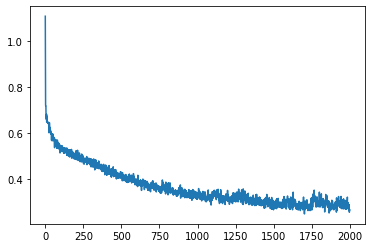

In [85]:
sns.lineplot(range(len(history.history['loss'])), history.history['loss'])

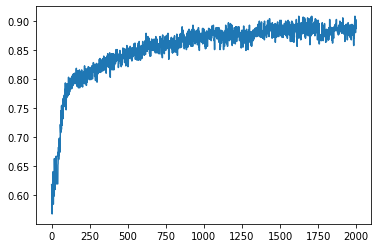

In [86]:
sns.lineplot(range(len(history.history['accuracy'])), history.history['accuracy'])

In [87]:
# Dajemy naszemu modelowi dane do przewidzenia i porównujemy wyniki z rzeczywistymi
pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f_score = f1_score(y_test, pred)

print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
        acc, precision, recall, f_score))

Accuracy: 0.8268156424581006
Precision: 0.7941176470588235
Recall: 0.7605633802816901
F1_score: 0.7769784172661871


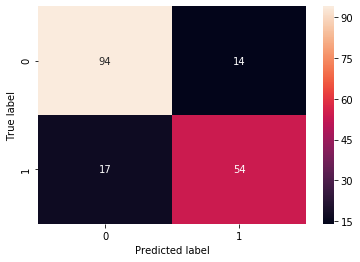

In [88]:
sns.heatmap(cm, annot=True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()